In [45]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib


seed = 1
np.random.seed(seed)

# Data creation

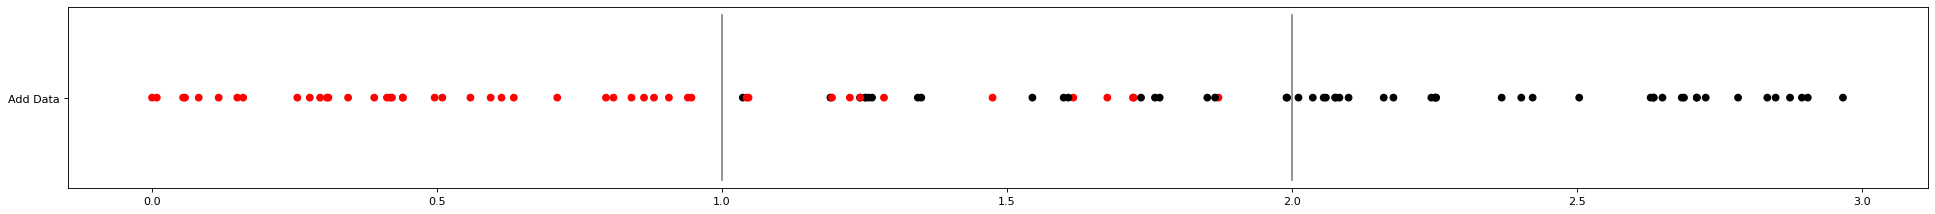

In [46]:

data_size = 100

x = np.random.uniform(low=0, high=3, size=(data_size,))
y = np.where(x<1, 0, np.where(x>2, 1, 1/2))
mid_index = np.argwhere(y==1/2)
mid_index = mid_index.reshape(-1)
rand_y = np.random.binomial(size=len(mid_index), n=1, p= 0.5)
y[mid_index] = rand_y
x = x.reshape(-1,1)

x_train, x_test_all, y_train, y_test_all = train_test_split(x, y, test_size=0.4, shuffle=True, random_state=seed)
x_test, x_calib, y_test, y_calib = train_test_split(x_test_all, y_test_all, test_size=0.5, shuffle=True, random_state=seed) 

figure(figsize=(30, 3), dpi=80)
# plt.plot(x, np.zeros_like(x), "x", color="y")
colors = ['red','black']
plt.scatter(x, np.full(len(x), "Add Data"), c=y, cmap=matplotlib.colors.ListedColormap(colors))
x1, y1 = [1, 1], [1, -1]
x2, y2 = [2, 2], [1, -1]
plt.plot(x1, y1, x2, y2, c="gray")

# Decision stump ensembel

In [47]:
model = RandomForestClassifier(max_depth=1, n_estimators=2, random_state=seed)
model.fit(x_train, y_train)
predictions_x_test = model.predict(x_test)
prob_x_test = model.predict_proba(x_test)
prob_x_calib = model.predict_proba(x_calib)

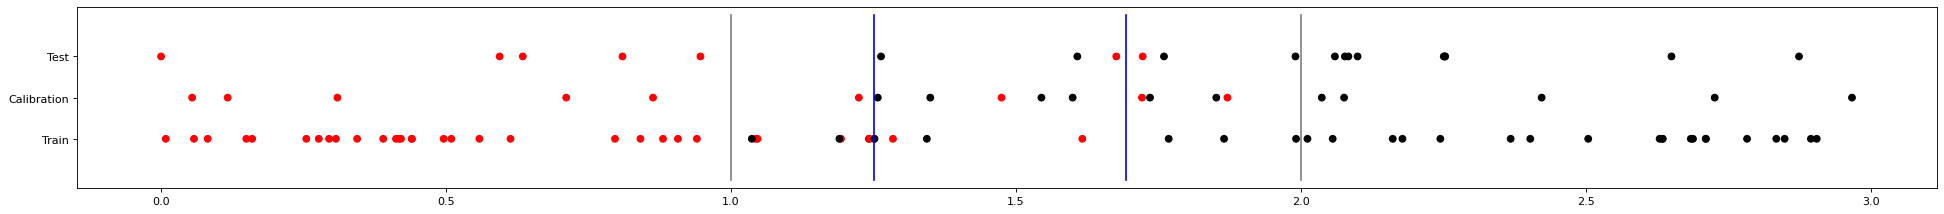

In [48]:
figure(figsize=(30, 3), dpi=80)

for estimator in model.estimators_:
    tree_threshold = estimator.tree_.threshold[0]
    plt.plot([tree_threshold,tree_threshold], [3,-1], c="blue")

plt.scatter(x_train, np.full(len(x_train), "Train"), c=y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x_calib, np.full(len(x_calib), "Calibration"), c=y_calib, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x_test, np.full(len(x_test), "Test"), c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
x1, y1 = [1, 1], [3, -1]
x2, y2 = [2, 2], [3, -1]
plt.plot(x1, y1, x2, y2, c="gray")